In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import xarray as ax
from datetime import datetime,date
import skill_metrics as sm
import tkinter 
import scipy as sp
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')


In [5]:
g=np.arange(1,101)

In [8]:
for h in g:
    h+=h
    print(h)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200


In [2]:
# !pip3 install SkillMetrics

In [3]:
#  !pip3 install SkillMetrics --upgrade

In [4]:
SUM_SH=ax.open_dataset('/home/eric/Desktop/ALL/FINAL_PRO/SUM_SH.nc')
SUM_LE=ax.open_dataset('/home/eric/Desktop/ALL/FINAL_PRO/SUM_LE.nc')
SUM_NR=ax.open_dataset('/home/eric/Desktop/ALL/FINAL_PRO/SUM_NR.nc')

In [3]:
# import cartopy as h

In [6]:
# K_LE

In [7]:
SH_13 =SUM_SH.sel(time=slice('2013'))#Sensible heat for 2013

In [8]:
np.max(SH_13.sshf)

<xarray.DataArray 'sshf' ()>
array(240878.25)

In [9]:
LE_13=SUM_LE.sel(time=slice('2013'))# Latent heat for 2013

In [10]:
daily_mean = SH_13.mean(dim=['lon','lat'])#Mean sensible heat along the lon and lat

In [11]:
d=daily_mean.resample(time='D').mean()#daily mean sensible heat

In [12]:
d_mean=LE_13.mean(dim=['lon','lat']).resample(time='D').mean()#Mean latent heat along the lon and lat

In [13]:
# Convertion from j/m2 to w/m2
j=d.sshf/(-24*60)
k=d_mean.slhf/(-24*60)

In [14]:
np.max(j)

<xarray.DataArray 'sshf' ()>
array(274.27511597)

In [15]:
k.to_netcdf('SLHF_mean13.nc')#saving as .nc file

In [16]:
j.to_netcdf('SSHF_mean13.nc')#saving as .nc file

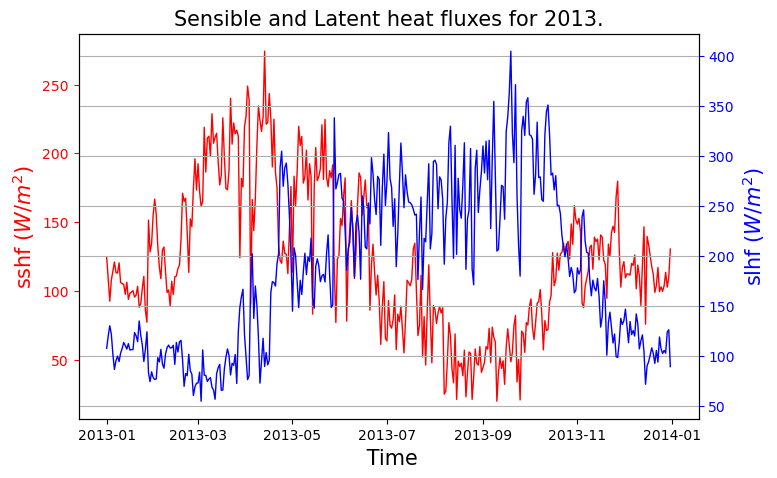

In [17]:
fig, axes=plt.subplots(figsize=(8,5))


# ax1=axes.twinx()
ax1=axes
ax1.plot(d.time,d.sshf/(-24*60),color='RED',lw=1, ls="-")
ax1.set_xlabel(' Time',fontsize=15)
ax1.set_ylabel('sshf ($W/m^2$)',color='red', fontsize=15)

ax2=axes.twinx()
# ax2=axes
ax2.plot(d.time,d_mean.slhf/(-24*60),color='BLUE',lw=1, ls="-")
# ax2.set_xlabel('Hours (UTC)',fontsize=15)
ax2.set_ylabel('slhf ($W/m^2$)',color='blue',fontsize=15)
# ax2.set_title('Timeseries and bar chart',fontsize=15)
ax2.set_title('Sensible and Latent heat fluxes for 2013.',color='black', fontsize=15)
ax2.tick_params(axis='y', colors='blue')
ax1.tick_params(axis='y', colors='red')
plt.grid()
# fig.savefig("h.tiff")

In [4]:
df=pd.read_excel('gr_2013.xlsx') #reading the csv data

In [5]:
df

,Days,H_Obs_Closed,H_Mod_Closed,H_Satellite,LE_Obs_Closed,LE_Mod_Closed,LE_Satellite
0,1,38.940892,50.693450,124.3550,3.566742,5.084050,107.9810
1,2,31.144714,43.851981,108.0020,3.359530,3.729060,120.4310
2,3,34.257935,52.115361,92.4408,3.577617,3.685264,130.4430
3,4,31.088148,52.397182,107.7020,6.165069,3.219485,122.0870
4,5,43.212073,65.378698,114.4370,5.640447,2.782968,102.0830
...,...,...,...,...,...,...,...
360,361,NaN,48.152673,103.6830,NaN,3.019202,105.8410
361,362,NaN,52.728166,113.4150,NaN,2.840168,103.1530
362,363,NaN,52.571272,102.6370,NaN,2.867062,124.1340
363,364,NaN,21.840476,109.7560,NaN,2.353482,126.5090


In [6]:
fd=df[['H_Obs_Closed','H_Mod_Closed','H_Satellite']]#Sensible heat

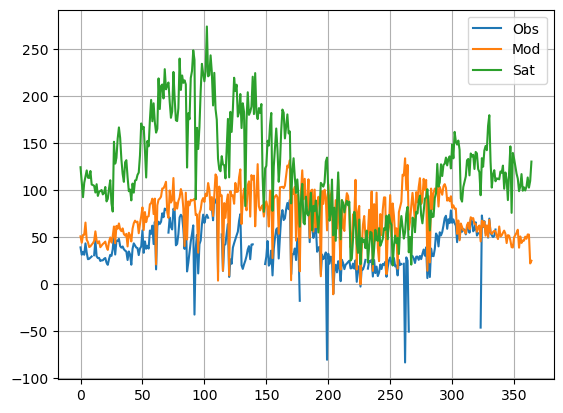

In [7]:
fd.H_Obs_Closed.plot(label='Obs')
fd.H_Mod_Closed.plot(label='Mod')
fd.H_Satellite.plot(label='Sat')
plt.grid()
plt.legend()


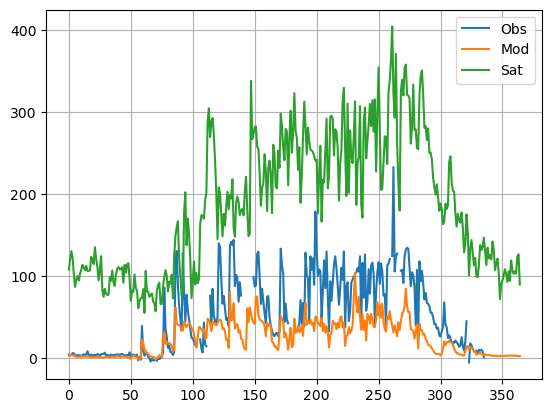

In [8]:
#Plot for latent heat flux
f=df[['LE_Obs_Closed','LE_Mod_Closed','LE_Satellite']]#Latent heat
f.LE_Obs_Closed.plot(label='Obs')
f.LE_Mod_Closed.plot(label='Mod')
f.LE_Satellite.plot(label='Sat')
plt.legend()
plt.grid()


In [9]:
from datetime import datetime, timedelta

start_date = datetime(2023, 1, 1)  # replace with your desired start date
new_date = start_date + timedelta(days=364)

formatted_date = new_date.strftime("%y-%m-%d")
print(formatted_date)  # prints something like "23,12,31"


23-12-31


In [10]:
# Convert date column to datetime format and set as index

df['Days']=pd.to_datetime(df['Days'])
# df.set_index('Days', inplace=True)

In [11]:
df

,Days,H_Obs_Closed,H_Mod_Closed,H_Satellite,LE_Obs_Closed,LE_Mod_Closed,LE_Satellite
0,1970-01-01 00:00:00.000000001,38.940892,50.693450,124.3550,3.566742,5.084050,107.9810
1,1970-01-01 00:00:00.000000002,31.144714,43.851981,108.0020,3.359530,3.729060,120.4310
2,1970-01-01 00:00:00.000000003,34.257935,52.115361,92.4408,3.577617,3.685264,130.4430
3,1970-01-01 00:00:00.000000004,31.088148,52.397182,107.7020,6.165069,3.219485,122.0870
4,1970-01-01 00:00:00.000000005,43.212073,65.378698,114.4370,5.640447,2.782968,102.0830
...,...,...,...,...,...,...,...
360,1970-01-01 00:00:00.000000361,NaN,48.152673,103.6830,NaN,3.019202,105.8410
361,1970-01-01 00:00:00.000000362,NaN,52.728166,113.4150,NaN,2.840168,103.1530
362,1970-01-01 00:00:00.000000363,NaN,52.571272,102.6370,NaN,2.867062,124.1340
363,1970-01-01 00:00:00.000000364,NaN,21.840476,109.7560,NaN,2.353482,126.5090


In [12]:
fd=pd.DataFrame(df)# converting the data df into a dataframe

In [13]:
fd

,Days,H_Obs_Closed,H_Mod_Closed,H_Satellite,LE_Obs_Closed,LE_Mod_Closed,LE_Satellite
0,1970-01-01 00:00:00.000000001,38.940892,50.693450,124.3550,3.566742,5.084050,107.9810
1,1970-01-01 00:00:00.000000002,31.144714,43.851981,108.0020,3.359530,3.729060,120.4310
2,1970-01-01 00:00:00.000000003,34.257935,52.115361,92.4408,3.577617,3.685264,130.4430
3,1970-01-01 00:00:00.000000004,31.088148,52.397182,107.7020,6.165069,3.219485,122.0870
4,1970-01-01 00:00:00.000000005,43.212073,65.378698,114.4370,5.640447,2.782968,102.0830
...,...,...,...,...,...,...,...
360,1970-01-01 00:00:00.000000361,NaN,48.152673,103.6830,NaN,3.019202,105.8410
361,1970-01-01 00:00:00.000000362,NaN,52.728166,113.4150,NaN,2.840168,103.1530
362,1970-01-01 00:00:00.000000363,NaN,52.571272,102.6370,NaN,2.867062,124.1340
363,1970-01-01 00:00:00.000000364,NaN,21.840476,109.7560,NaN,2.353482,126.5090


In [14]:
# Create a new data frame with all Days
all_months = pd.DataFrame(pd.date_range('2013-01-01', '2013-12-31', freq='D'))

In [15]:
all_months

,0
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
360,2013-12-27
361,2013-12-28
362,2013-12-29
363,2013-12-30


In [16]:
fd['Days']=all_months #Replacing the Days with the dataframe created 

In [17]:
fd

,Days,H_Obs_Closed,H_Mod_Closed,H_Satellite,LE_Obs_Closed,LE_Mod_Closed,LE_Satellite
0,2013-01-01,38.940892,50.693450,124.3550,3.566742,5.084050,107.9810
1,2013-01-02,31.144714,43.851981,108.0020,3.359530,3.729060,120.4310
2,2013-01-03,34.257935,52.115361,92.4408,3.577617,3.685264,130.4430
3,2013-01-04,31.088148,52.397182,107.7020,6.165069,3.219485,122.0870
4,2013-01-05,43.212073,65.378698,114.4370,5.640447,2.782968,102.0830
...,...,...,...,...,...,...,...
360,2013-12-27,NaN,48.152673,103.6830,NaN,3.019202,105.8410
361,2013-12-28,NaN,52.728166,113.4150,NaN,2.840168,103.1530
362,2013-12-29,NaN,52.571272,102.6370,NaN,2.867062,124.1340
363,2013-12-30,NaN,21.840476,109.7560,NaN,2.353482,126.5090


In [18]:
fd.set_index('Days', inplace=True)#Setting the days as the index

In [58]:
fd

,H_Obs_Closed,H_Mod_Closed,H_Satellite,LE_Obs_Closed,LE_Mod_Closed,LE_Satellite
Days,,,,,,
2013-01-01,38.940892,50.693450,124.3550,3.566742,5.084050,107.9810
2013-01-02,31.144714,43.851981,108.0020,3.359530,3.729060,120.4310
2013-01-03,34.257935,52.115361,92.4408,3.577617,3.685264,130.4430
2013-01-04,31.088148,52.397182,107.7020,6.165069,3.219485,122.0870
2013-01-05,43.212073,65.378698,114.4370,5.640447,2.782968,102.0830
...,...,...,...,...,...,...
2013-12-27,NaN,48.152673,103.6830,NaN,3.019202,105.8410
2013-12-28,NaN,52.728166,113.4150,NaN,2.840168,103.1530
2013-12-29,NaN,52.571272,102.6370,NaN,2.867062,124.1340


In [20]:
fd.resamp=fd.resample('M').mean()# Resampling and calculating the monthly mean

In [21]:
fd.resamp

,H_Obs_Closed,H_Mod_Closed,H_Satellite,LE_Obs_Closed,LE_Mod_Closed,LE_Satellite
Days,,,,,,
2013-01-31,31.879825,47.067748,107.831003,4.258003,1.832480,106.755768
2013-02-28,39.877748,63.844152,133.684561,3.281410,1.196234,93.838007
2013-03-31,57.701172,85.385238,196.979129,21.691313,14.752497,92.120458
2013-04-30,53.274590,82.907607,185.002280,42.411888,35.944712,170.544157
2013-05-31,35.599027,91.014808,173.833994,92.301006,38.754150,195.285387
2013-06-30,45.994310,88.108322,132.580193,65.094880,34.572261,241.073967
2013-07-31,29.099109,77.183203,85.107126,86.965447,38.626340,249.043129
2013-08-31,17.794685,61.590457,52.742565,91.015070,44.853596,258.297710
2013-09-30,15.633420,78.264777,55.701253,107.008995,47.778000,295.041167


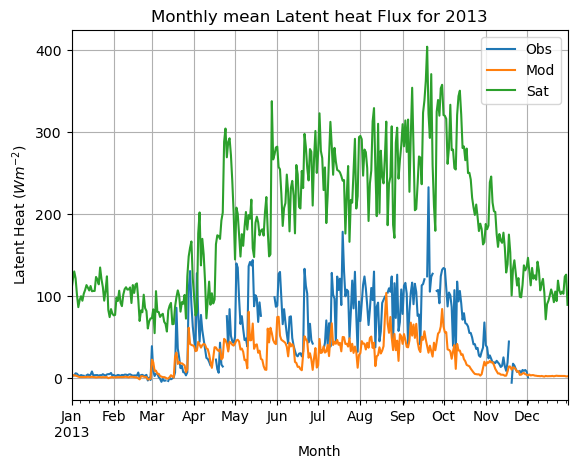

In [22]:
# Plotting multiple time series
f=fd[['LE_Obs_Closed','LE_Mod_Closed','LE_Satellite']]#Latent heat
f.LE_Obs_Closed.plot(label='Obs')
f.LE_Mod_Closed.plot(label='Mod')
f.LE_Satellite.plot(label='Sat')
plt.xlabel('Months')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Latent Heat $(Wm^{-2})$')
plt.title('Monthly mean Latent heat Flux for 2013')
plt.legend()
plt.savefig('lt.png')

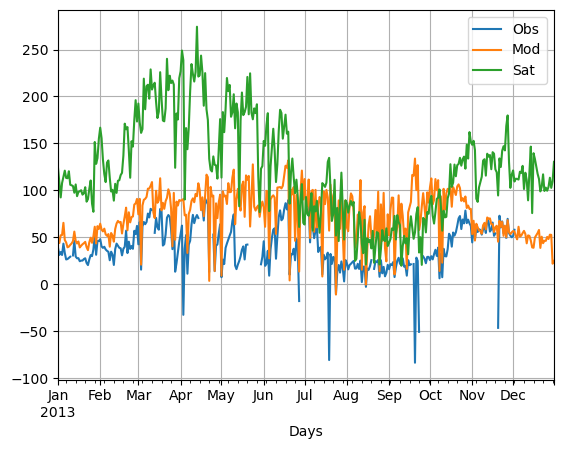

In [23]:
g=fd[['H_Obs_Closed','H_Mod_Closed','H_Satellite']]#Sensible heat
g.H_Obs_Closed.plot(label='Obs')
g.H_Mod_Closed.plot(label='Mod')
g.H_Satellite.plot(label='Sat')
plt.legend()
plt.grid()

In [24]:
# Creating a list of months
fd.nam=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

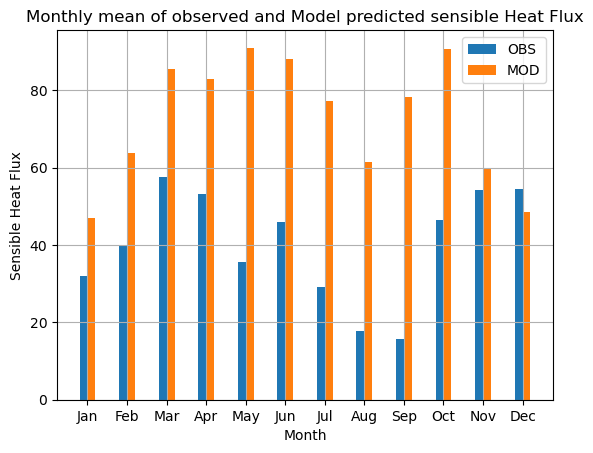

In [25]:
# Plotting a bar plot
values=np.arange(len(fd.nam))

width=0.2
plt.bar(values,fd.resamp['H_Obs_Closed'],width,label='OBS')
# plt.bar(fd.index,H_Mod_Closed)
plt.bar(values+width,fd.resamp['H_Mod_Closed'],width,label='MOD')
plt.legend()
plt.xticks(values+0.1,fd.nam)
plt.title('Monthly mean of observed and Model predicted sensible Heat Flux')
plt.xlabel('Month')
plt.ylabel('Sensible Heat Flux')
plt.grid()

Text(0, 0.5, 'Sensible Heat Flux')

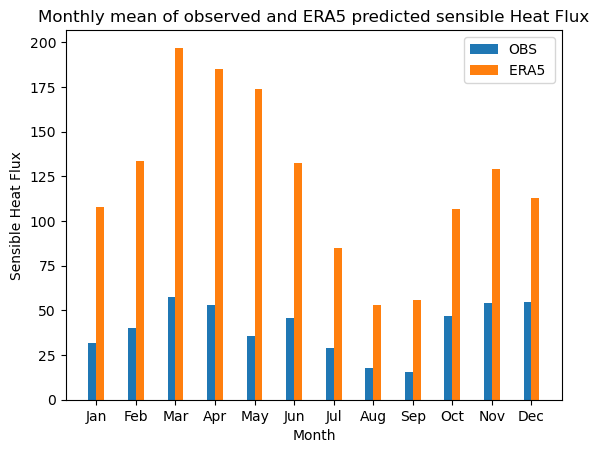

In [26]:
values=np.arange(len(fd.nam))

width=0.2
plt.bar(values,fd.resamp['H_Obs_Closed'],width,label='OBS')
# plt.bar(fd.index,H_Mod_Closed)
plt.bar(values+width,fd.resamp['H_Satellite'],width,label='ERA5 ')
plt.legend()
plt.xticks(values+0.1,fd.nam)
plt.title('Monthly mean of observed and ERA5 predicted sensible Heat Flux')
plt.xlabel('Month')
plt.ylabel('Sensible Heat Flux')

Text(0, 0.5, 'Sensible Heat Flux')

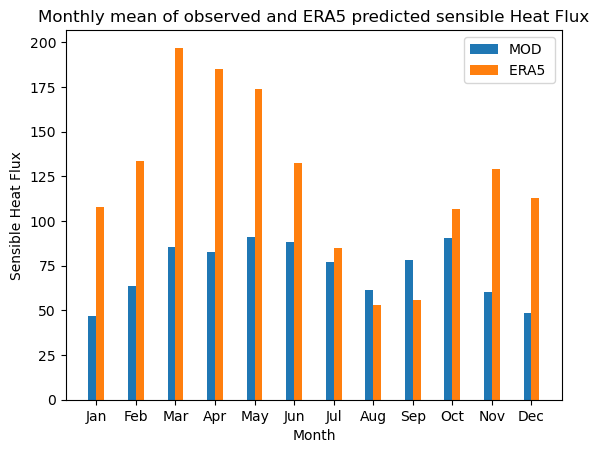

In [27]:
values=np.arange(len(fd.nam))

width=0.2
plt.bar(values,fd.resamp['H_Mod_Closed'],width,label='MOD')
# plt.bar(fd.index,H_Mod_Closed)

plt.bar(values+width,fd.resamp['H_Satellite'],width,label='ERA5 ')
plt.legend()
plt.xticks(values+0.1,fd.nam)
plt.title('Monthly mean of observed and ERA5 predicted sensible Heat Flux')
plt.xlabel('Month')
plt.ylabel('Sensible Heat Flux')

<Axes: xlabel='Days'>

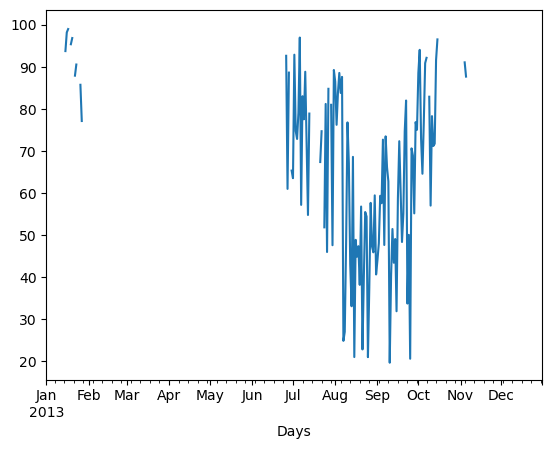

In [28]:
fd['H_Satellite'].where(fd['H_Satellite']<100,).plot()

In [29]:
kl=[1,2,3,2,3,2,2,4,5,6,7,2,4,6]

In [181]:
kl

[1, 2, 9, 2, 3, 2, 2, 4, 5, 6, 7, 2, 4, 6]

In [ ]:
import pandas as pd

# Read data from Excel file into a DataFrame
df = pd.read_excel('your_excel_file.xlsx')

# Find the indices of large values
large_indices = df > 30

# Replace large values with a specific value
replacement_value = 99
df[large_indices] = replacement_value

# Save modified data back to Excel file
df.to_excel('modified_excel_file.xlsx', index=False)

In [2]:
# !pip install jupyter themes

In [1]:
# !pip install jupyter themes

In [33]:
!jt -t chesterish

/bin/bash: jt: command not found


In [21]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


ImportError: cannot import name lgeos

In [7]:
# !pip3 install shapely

In [8]:
# !pip install shapely --no-binary shapely

In [18]:
# !pip install pytest

In [17]:
# pytest --pyargs shapely.tests

In [1]:
# !pip install pygeos

In [92]:
slf = pd.DataFrame([fd.LE_Satellite, fd.LE_Obs_Closed])
slf_2 = pd.DataFrame([fd.LE_Mod_Closed, fd.LE_Obs_Closed])

In [93]:
slf.T

,LE_Satellite,LE_Obs_Closed
Days,,
2013-01-01,107.9810,3.566742
2013-01-02,120.4310,3.359530
2013-01-03,130.4430,3.577617
2013-01-04,122.0870,6.165069
2013-01-05,102.0830,5.640447
...,...,...
2013-12-27,105.8410,NaN
2013-12-28,103.1530,NaN
2013-12-29,124.1340,NaN


In [94]:
slf_2.T

,LE_Mod_Closed,LE_Obs_Closed
Days,,
2013-01-01,5.084050,3.566742
2013-01-02,3.729060,3.359530
2013-01-03,3.685264,3.577617
2013-01-04,3.219485,6.165069
2013-01-05,2.782968,5.640447
...,...,...
2013-12-27,3.019202,NaN
2013-12-28,2.840168,NaN
2013-12-29,2.867062,NaN


In [95]:
SLF_imerg=slf.iloc[:,0]
SLF_gmt=slf.iloc[:,1]


SLF_CP=slf_2.iloc[:,0]
SLF_G=slf.iloc[:,1]

In [96]:
slf_im = stats.pearsonr(SLF_imerg,SLF_gmt)
slf_cp = stats.pearsonr(SLF_CP,SLF_G)

In [97]:
slfmean_im = sum((SLF_imerg-SLF_gmt)**2)/len(SLF_imerg)
slfcmean_cp = sum((SLF_CP-SLF_G)**2)/len(SLF_CP)

In [98]:
slfrmse_im = np.sqrt(slfmean_im)
slfcrmse_cp = np.sqrt(slfcmean_cp)

# slpdbias_img = sum(slpd_imerg-slpd_gmt)/len(slpd_imerg)
slpdbias_chirps = sum(slpd_chps-slpd_gauge)/len(slpd_chirps)

In [99]:
slfbias_img = sum(SLF_imerg-SLF_gmt)/len(SLF_imerg)
slfbias_cp = sum(SLF_CP-SLF_G)/len(SLF_CP)

In [100]:
slfstd_img = np.std(SLF_imerg)
slfstd_cp = np.std(SLF_CP)

In [101]:
slfobs = np.std(fd.resamp.LE_Obs_Closed)

In [102]:
slpd_cor = [1,slf_im[0], slf_cp[0]]
slpd_rmse = [0,slfrmse_im, slfcrmse_cp]
slpd_bias = [slfbias_img, slfbias_cp]
slpd_std = [slfobs,slfstd_img, slfstd_cp]
label = ['OBS','ERA5','MOD']
numberArray = np.array(([1.1,2.2,3.3],[4.4,5.5,6.6]))

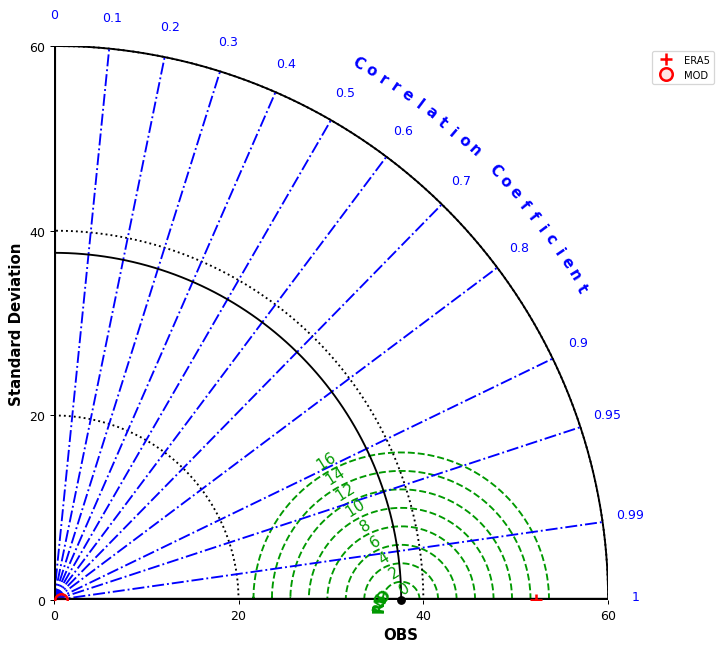

In [104]:
fig1 = plt.figure(figsize=(10,8),dpi=90)

sdev = np.array(slpd_std)
crmsd = np.array(slpd_rmse)
ccoef = np.array(slpd_cor)
rms = np.arange(0,18,2)
# rms = np.arange(0,40,2)

fig1=sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel =label, 
                          markerLegend = 'on',
                          styleOBS = '-', colOBS = 'k', markerobs = 'o',
                          markerSize = 10, tickRMS = rms,
                          showlabelsRMS = 'on',cmapzdata = crmsd ,rincSTD = np.arange(26,30,0.05),
                          titleRMS = 'on', titleOBS = r'OBS',alpha=0.1)

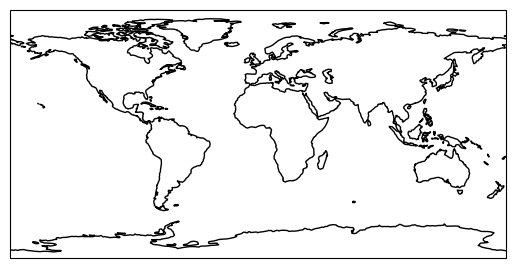

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()